In [1]:
!pip install yfinance numpy pandas matplotlib ipywidgets

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, HBox, VBox, Layout
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


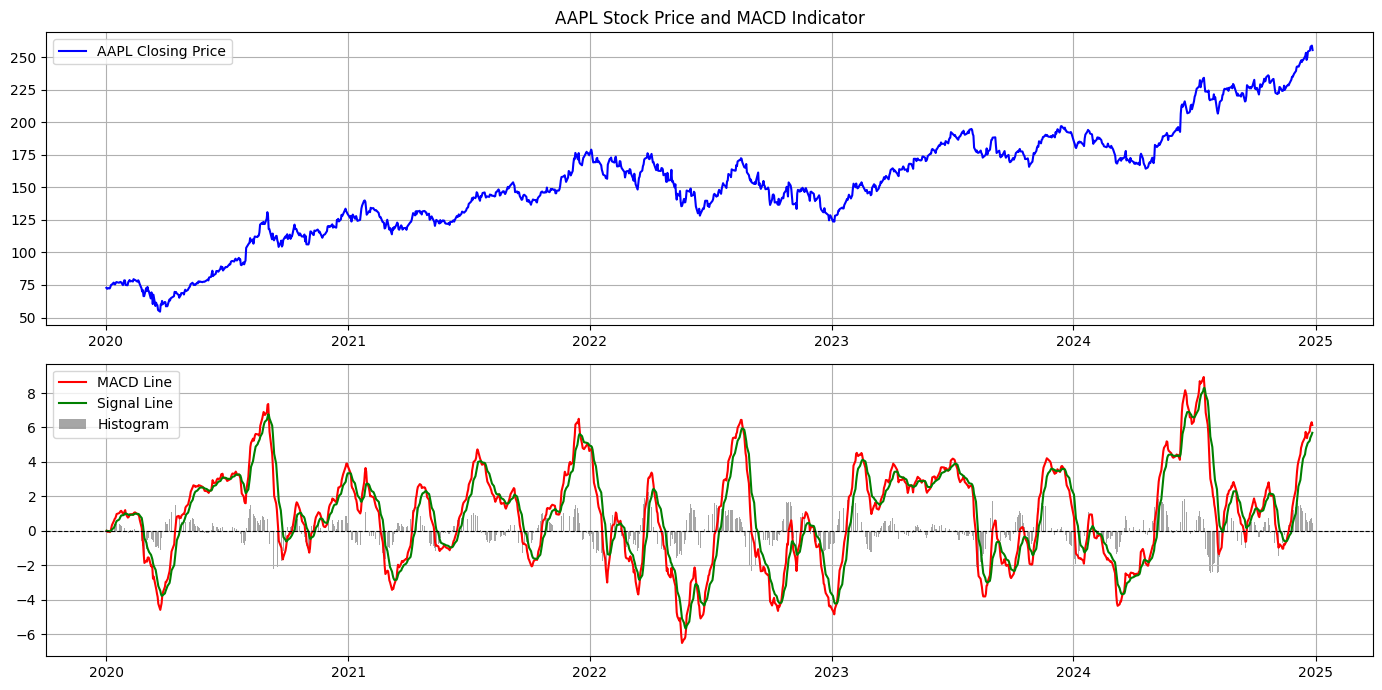

In [2]:
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    df['EMA_12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['MACD_Line'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD_Line'].ewm(span=signal_window, adjust=False).mean()
    df['Histogram'] = df['MACD_Line'] - df['Signal_Line']
    return df

def plot_macd(df, ticker):
    plt.figure(figsize=(14, 7))
    plt.subplot(2, 1, 1)
    plt.plot(df['Close'], label=f"{ticker} Closing Price", color='blue')
    plt.title(f"{ticker} Stock Price and MACD Indicator")
    plt.legend(loc='upper left')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(df['MACD_Line'], label='MACD Line', color='red')
    plt.plot(df['Signal_Line'], label='Signal Line', color='green')
    plt.bar(df.index, df['Histogram'], label='Histogram', color='gray', alpha=0.7)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

def compute_macd(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data = data[['Close']]
    df = pd.DataFrame(data)
    df = calculate_macd(df)
    plot_macd(df, ticker)

ticker_widget = widgets.Text(
    placeholder="Enter ticker symbol (e.g., MSFT)",
    layout=Layout(width="30%", height="35px")
)

start_date_widget = widgets.Text(
    placeholder="YYYY-MM-DD",
    layout=Layout(width="30%", height="35px")
)

end_date_widget = widgets.Text(
    placeholder="YYYY-MM-DD",
    layout=Layout(width="30%", height="35px")
)

compute_button = widgets.Button(
    description="Compute MACD",
    button_style="success",
    layout=Layout(width="20%", height="40px",)
)

title_widget = widgets.HTML(
    value='<h2 style="background: linear-gradient(to right, #ff7e5f, #feb47b); color: white; padding: 10px; text-align: center;">Interactive MACD Analysis</h2>'
)

ticker_label = widgets.Label(value="Ticker:", layout=Layout(width="10%"))
start_date_label = widgets.Label(value="Start Date:", layout=Layout(width="10%"))
end_date_label = widgets.Label(value="End Date:", layout=Layout(width="10%"))

ticker_row = HBox([ticker_label, ticker_widget], layout=Layout(width="60%"))
start_date_row = HBox([start_date_label, start_date_widget], layout=Layout(width="60%"))
end_date_row = HBox([end_date_label, end_date_widget], layout=Layout(width="60%"))

def on_button_click(change):
    ticker = ticker_widget.value
    start_date = start_date_widget.value
    end_date = end_date_widget.value
    if not ticker or not start_date or not end_date:
        print("Please fill in all fields!")
    else:
        compute_macd(ticker, start_date, end_date)

compute_button.on_click(on_button_click)

input_widgets = VBox(
    [
        title_widget,
        ticker_row,
        start_date_row,
        end_date_row,
        compute_button,
    ],
    layout=Layout(align_items="flex-start", justify_content="flex-start", margin="20px")
)

display(input_widgets)